### 1. 성능 평가 (Evaluation)
- 올바른 성능 평가가 이루어져야 정확하게 모델의 완성도를 측정하고, 학습에 대한 평가를 끝내고, 모델이 충분히 완성되었다고 판단할 수 있기 때문이다.
- 각 머신러닝 문제는 서로 다른 **성능평가 척도 (Evalution Metric)** 를 가지며, 하나의 문제에 대해서도 목적에 따라 여러 가지 척도를 사용할 수 있다.
    - accuracy, precision, recall 등
    - https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

### 2. Loss 와 Metric
- Loss : 모델 학습시 학습데이터(train data)를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
- Metric : 모델 학습 종료 후 테스트데이터(test data)를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수

**Loss와 Accuracy**

정확도와 손실 (교차 엔트로피)이 서로 다른 두 가지를 측정하기 때문입니다. 교차 엔트로피 손실은 클래스 레이블에 더 가까운 예측에 대한 손실을 줄입니다. 반면 정확도는 특정 샘플에 대한 이진 참 / 거짓입니다. 즉, 여기서 손실은 연속 변수입니다. 즉, 예측이 1 (진정 레이블의 경우)에 가까우 고 0 (거짓 레이블의 경우)에 가까울 때 가장 좋습니다. 정확성은 일종의 불 연속적입니다.
    - 내가 관심있는 것은 무엇인가? 손실? 정확성?

**왜 Accuracy가 학습단계에 좋은 Loss가 될 수 없는지**

Discrete한 Accuracy는 Continuous한 Cross Entropy에 비해, 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못한다. 비록 위 예시에서 1번 케이스는 Accuracy는 2번 케이스보다 낮았지만, Loss를 낮추는 쪽으로 더 학습이 진행되면 Accuracy도 높이면서 A, B, C간 확률분포의 차이(0.7-0.15)를 더욱 뚜렷하게 해서 결과적으로는 더 명확한 분류 기준을 학습한 모델이 될 여지가 있다.

Accuracy를 기준으로 학습이 진행된다면 2번 케이스는 이미 완벽한 Accuracy에 도달했으므로 더이상 정교한 학습이 이루어질 여지가 없어서(Accuracy가 loss가 된다면 loss=0) A, B, C간 확률분포의 차이(0.5-0.25)가 더 커지도록 학습이 진행되지 않을 것이다.

분류모델의 성능을 평가하는데는 Accuracy가 더 우월한 Metric입니다. 궁극적으로 우리가 원하는 모델은 테스트 데이터에 대한 Accuracy가 높은 모델이지, Cross Entropy가 얼마나 낮아졌는지가 우리의 궁극적 관심은 아닙니다. 하지만 모델의 정확성을 향상시켜 궁극적으로 Accuracy가 높은 모델을 만들기 위해 활용하는 Loss로는 Cross Entropy가 더욱 적당한 것입니다.

하지만 회귀모델일 경우 RMSE가 Loss와 Metric 양쪽으로 효과적으로 사용될 수도 있습니다. 즉, Loss나 Metric으로 어떤 함수를 활용할지는 해결해야 할 Task에 따라 다릅니다. 하지만 우리가 해결해야 할 문제에 어떤 Loss나 Metric이 적당한지를 판단하는 직관력은 정말 중요합니다.

### 3. Confusion Matrix 와 Precision/Recall

**True Positive (TP)**- 모델이 양성(positive)을 양성으로 맞혔을 때

**True Negative (TN)** - 모델이 음성(Negative)을 음성으로 맞혔을 때

**False Positive (FP)** - 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때

**False Negative (FN)** - 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때



**정확도**
- 정확히 분류된 표본의 수
- 이진 분류일 경우:

     $정확도(Accuracy) = \frac {TP+TN} {TP+TN+FP+FN}$

- 멀티 클래스 분류일 경우, 표본의 결과를 정답, 오답으로 나누어:

    $(정확도) = \frac{ (정답을~맞힌~예측의~수)} { (전체~문제의~수)} = \frac {TP+TN} {TP+TN+FP+FN}$


**Precision**

$정밀도(Precision) = \frac {TP} {TP+FP}$

- 모델이 양성으로 규정한 것이 얼마나 정확한지를 보고 싶은 것
- 모델이 음성으로 규정한 것에 대해서는 관심없음
- 정밀도가 높다는 것은 FP가 낮다는 의미
- 즉, 모델이 양성으로 잘못 규정한 것이 적을수록 정밀도는 올라간다.

**Recall**

$재현율(Recall) = \frac {TP} {TP+FN}$

- 실제로 양성이 것들이 얼마나 모델에 의해 정확하게 탐지되었나를 보고 싶은 것입니다. 
- 실제로 음성인 것을 양성으로 잘못 규정한 것에 대해서는 관심이 없습니다. 
- 재현율이 높다는 것은 FN이 낮다는 것입니다. 
- 즉 모델이 실제 양성을 분류해 내지 못한 경우가 적을 수록 재현율은 올라갑니다.

**정확도는 높으나 재현율이 낮은 경우**
- 이 모델은 실제 암환자를 거의 가려내지 못한다!
- 정확도가 높게 나온 이유는 데이터 대부분이 4가지 카테고리 중 TN 에 몰려 있고, 이 모델은 TN을 정확하게 분류했기 때문이다.
- **음성 대 양성 데이터 분포가 불균형할 경우 정확도는 모델을 평가하는데 좋은 척도가 되지 못한다.**

**F-score**
- Precision과 Recall은 단독으로 평가 척도로 사용하기에 부족하다.
- Precision이 좋은 척도가 될만 한 스팸메일 분류기 모델을 생각해 봅시다. 
    - 이 경우에 FN은 다소 허용할만 합니다. 스팸이 잘못 걸러져 메일함이 들어오긴 했지만 FP가 발생할 경우에는 꼭 필요한 비지니스 메일이 스팸함에 버려 엄청난 손실이 발생하게 될지도 모릅니다. 그래서 FP를 줄이려면 애매한 메일을 음성으로 판단하는 게 좋은데, 그렇다고 해서 FN을 무한히 허용하면 스팸 메일 분류기 자체가 쓸모없어지는 상황이 될 수 있어 좋지 않습니다.

- Recall이 좋은 척도가 될만한 사례는 위의 암환자 예측 모델이 적당할 것 같습니다. 
    - 암 의심환자를 음성으로 분류했다가 환자의 생명을 위험에 빠뜨리게 되면 안되므로, FN을 최소화하는 Recall이 좋은 척도가 될 수 있을지도 모릅니다. 하지만 여기는 함정이 있습니다. Recall을 최대화하는 방법은 간단합니다. 모든 환자를 양성으로 진단해 버리면 됩니다. 적어도 FN이 발생하게 되지는 않으니 Recall은 무조건 1이 됩니다. 그러나 이런 예측모델 또한 쓸모가 없긴 마찬가지입니다.
    
- **F1 score**
    - Precision 과 Recall의 조화평균이 되는 값, 둘다 고려 가능
    - $F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$
    - F score에서 $\beta$가 1이 될 때를 말한다.

**Precision보다 recall을 좀 더 중요시하고 싶다면 beta를 1 보다 크게 하는 것이 좋다.**

### 4. Threshold의 변화에 따른 모델 성능

- 우리가 학습시킨 모델의 출력이 일정 이상 기준선(Threshold)를 넘어가면 우리는 양성이라고 분류하게 될 것입니다.
- 그런데 우리가 학습시킨 모델은 Recall이 높을 수록 좋은 모델입니다. 양성일 확률이 0.5가 넘으면 양성이라고 분류하게 하는 것보다는 양성일 확률이 0.3만 넘으면 양성이라고 분류하도록 해보면 어떨까요? 
- 모델의 파라미터 등은 전혀 변한 것이 없는데, 모델의 출력값을 해석하는 방식만 다르게 해도 이 모델은 전혀 다른 성능을 가지게 됩니다. 따라서 이 모델의 성능척도 값도 달라지게 될 것입니다.
- Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 PR(Precision and Recall) 커브와 ROC(Receiver Operating Characteristic) 커브를 그려보는 두가지 방법이 있습니다.

#### 4-1. 데이터 준비

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


#### 4-2. Task의 재구성
- noise 추가해 성능을 낮추기! 랜덤한 값으로 이루어진 200*n_features, 즉 800개의 컬럼을 매 데이터마다 추가한다

In [2]:
random_state = np.random.RandomState(0) # seed 적용
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200*n_features)]   # 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

print(X.shape)   # 804개의 feature 가진 150개의 데이터

(150, 804)


In [ ]:
# 평균 0, 표준편차 1의 가우시안 표준정규분포 난수를 matrix array (m,n) 으로 생성
np.random.randn(m,n)

In [3]:
# 원래 붓꽃 데이터는 3가지 라벨이나, 여기서는 양성/음성으로 나뉘는 이진 분류 (binary classification) 2개 라벨 분류
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


#### 모델 학습
2개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)으로 모델을 구성하여 학습시킨 후 test 데이터를 넣어 정확도를 확인

In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test) # 평균 정확도 리턴, 0.48이면 성능 매우 낮음

0.48

In [5]:
# 커널 바꾸기
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test) # 0.8 높음

0.8

#### classifier.predict() 리턴값과 y_test를 비교

In [6]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [7]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

모델 뒤에 Softmax가 있어서 확률값을 출력하는 Logistic Regression 모델과는 달리, SVM에서 별도로 제공하는 decision_function() 함수가 존재합니다. 이 함수값은 (-1, 1) 범위값을 가지는데, 0보다 작으면 음성(label=0), 0보다 크면 양성(label=1)으로 분류하게 됩니다.

In [8]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


**confusion_matrix 계산**

[[TP, FN]. [FP, TN]]

- classifiaction_report 함수는 Precision, Recall, F1-score 등의 평가척도값을 계산

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



양성 기준을 확대해서 -0.1 보다 큰 것을 양성으로 분류한다면?

In [12]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



recall은 0.77 에서 0.81 로 상승했으나, f1은 0.80 에서 0.79로 소폭 하락

In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [14]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [16]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



### 5. Precision-Recall 커브
- 분류모델의 분류기준(Threshold)을 변경함에 따라 동일한 모델에서도 Precision, Recall 등 평가척도 값이 달라지는 것을 확인했다.
- PR(Precision-Recall) 커브는 Recall을 X축, Precision을 Y축에 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것이다.

In [20]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


**AUC(Area Under Curve)**
- Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법
- PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 average_precision_score 함수를 사용

$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$

average_precision_score(AP) 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다. 그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 되겠군요. 하지만 사이킷런 문서에서는 average_precision_score와 PR AUC가 구현 측면에서 약간 다르다고 설명하고 있습니다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해

Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.91')

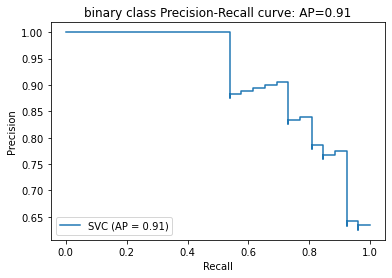

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

average_precision_score 값은 최대 1이 될 수 있을 것입니다. 위에서는 0.91이 나왔군요. 그렇다면 모델을 바꿔 보면 이 값이 어떻게 달라질지 궁금해집니다. 우리는 위에서 SVM의 커널을 'poly'로 주었을 때 Accuracy가 매우 낮았던 것을 기억합니다. 이때의 averageprecisionscore 값이 어떻게 될지 직접 구현해서 확인

**SVM 커널의 종류**

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

In [26]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve:AP=0.90')

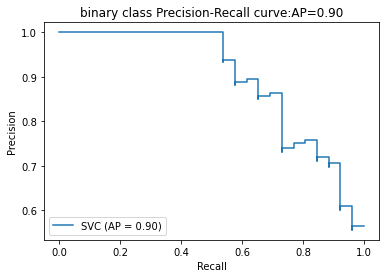

In [27]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve:'
                  'AP={0:0.2f}'.format(average_precision))

### 6. ROC 커브
ROC(Receiver Operating Characteristic Curve): 수신자 조작 특성 곡선
- Confusion Matrix 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법

#### TR Rate
$TPR (Sensitivity) = \frac {TP} {TP + FN}$
- recall 과 유사

$FPR (1-Specificity) = \frac {FP} {TN + FP}$
- 음성 샘플에 대한 recall

#### AUC 예시 영역
- 넓이가 넓은 모델일수록, 상대적으로 좋은 성능을 보여준다.

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

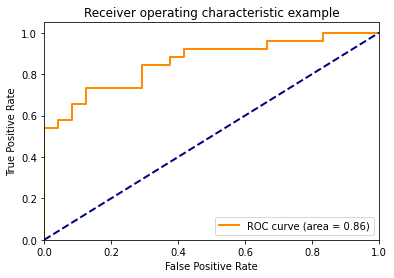

auc result:0.8605769230769231


In [31]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다. 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

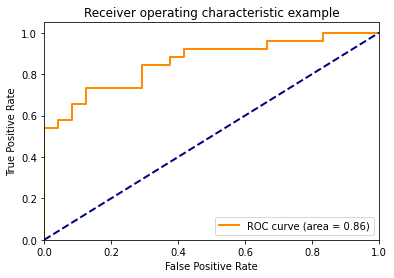

auc result:0.8605769230769231


In [32]:
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

### 7. 다양한 평가척도
#### 7-1. 회귀 모델의 평가 척도
- 분류 모델에 비해 평가 척도 다루는 것이 간단
- loss 함수가 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분
- 어떤 loss가 적합한지 특성 알아보는 것이 중요

**MSE, RMSE 등 square 계열 Metric과 MAE, MAPE 등 absolute value 계열 Metric이 특이값에 대해 어떤 차이를 보이는지 설명해 주세요.**

MSE, RMSE는 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값에 민감하게 반응하며, Outlier가 많은 데이터에 대해 모델이 강건(robust)하지 못하다. MAE, MAPE는 오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 강건한다.

#### 7-2. 랭킹 모델의 평가척도
추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가지고 있습니다. 이런 모델들이 일반적인 분류모델과 다른 점은, 랭킹(우선순위) 개념이 추가된다는 점입니다. User를 입력으로 했을 때, Item들이 추천할만한지 여부를 분류만 하는 것이 아니라, 얼마나 추천할만 한지 랭킹까지 매겨야 한다는 점입니다.

#### MRR(Mean Reciprocal Rank)
- 우선순위를 고려한 평가기준 중 가장 간단한 모델이다. 
    - 각 사용자마다 제공한 추천 컨텐츠 중 관련있는 컨텐츠 중 가장 높은 위치를 역수로 계산(1/k)한다.
    - 사용자마다 계산된 점수를 모아 평균을 계산한다.
- MRR은 사용자가 몇 개의 컨텐츠에 관심이 있었는지, 각 관련 컨텐츠는 어느 위치에 있었는지를 고려하지 않는다. 오직, 가장 상위의 관련 컨텐츠의 위치만을 고려하여 점수를 계산함으로써 가장 관련있는 컨텐츠가 얼마나 상위에 올라가 있는지를 평가한다.

장점
- 간단하고 쉽다
- 제공된 목록 중 가장 상위의 관련된 컨텐츠에만 집중하기 때문에, 사용자에 가장 관련있는 컨텐츠가 최상위에 있는가를 평가할 때 용이하다.
- 새로운 컨텐츠가 아니라 이미 사용자가 알고 있는 컨텐츠 중 가장 선호할만한 컨텐츠를 보여주고자 할 때 좋은 평가 기준이 된다.

단점
- 제공된 목록 중 하나의 컨텐츠에만 집중하기 때문에 나머지 부분에 대해서는 평가하지 않는다.(2, 3번째 관련 컨텐츠에 대해서는 평가를 하지 않는다.)
- 관련 컨텐츠의 개수가 달라도 첫 번째 관련 컨텐츠의 위치가 같은 경우 같은 점수를 가지므로 변별력을 가지기 어렵다.
- 사용자가 컨텐츠에 대해 잘 알지 못해 여러 번 탐색을 해야 하는 경우 살펴봐야 하는(관련있는) 컨텐츠의 개수가 1개 이상일 가능성이 높으므로 좋은 평가 기준이 되기 어렵다.

**사용자가 원하는 목적이 비교적 뚜렷하고 잘 알고 있는 알려진 컨텐츠를 추천하는 IR(배달 어플리케이션의 배달 음식점 검색)을 평가할 때 좋은 모델이 될 수 있다.**

#### MAP
- 상위 N개까지의 정밀도 구함
- 상위 N개의 관련된 컨텐츠에 대해 전부 점수를 반영할 수 있되, 관련된 컨텐츠의 위치에 따라 점수에 차등을 줄 수 있는 평가 모델이 필요하다.
    - 각 사용자마다 관련된 컨텐츠를 구하여 해당 관련 컨텐츠 위치까지의 목록(sublist)에 대하여 정밀도를 계산한다.
    - 계산된 정밀도 값들에 대하여 사용자별로 평균을 내고, 그 결과를 모두 모아 평균을 계산한다.

장점
- 추천 컨텐츠의 단순한 성능을 평가하는 것이 아니라 우선순위를 고려한 성능을 평가할 수 있다.
- 상위에 있는 오류(관련없는 컨텐츠)에 대해서는 가중치를 더 주고, 하위에 있는 오류에 대해서는 가중치를 적게 주어 관련 컨텐츠가 상위에 오를 수 있도록 도움을 준다.

단점
- MAP는 관련 여부가 명확하지 않은 경우에는 계산하기 어렵다.
- 1 ~ 5점으로 평가하는 평점같이 관련 여부를 판단하기 어려운 경우는 MAP를 사용하기 어렵다.(4~5점은 관련있다고 판단하더라도 3점은 관련 여부를 판단하기 어려울 것이다.)

MAP은 전반적으로 훌륭한 평가 모델이 될 수 있다. 만약 컨텐츠의 관련 여부를 이분법으로 나눌 수 있다면 MAP은 좋은 평가 모델이 될 것이다. 하지만, 사용자에게 더 관련이 있는 컨텐츠를 상위에 노출시키고 있는지에 대해 평가하고 싶다면 다음에 설명하는 NDCG라는 평가 모델을 활용해야 한다.

#### NDCG
NDCG는 관련 여부에 대해 이분법적으로 구분하는 것이 아니라 더 관련있는 컨텐츠는 무엇인가?에 대해 집중하여 더 관련있는 컨텐츠를 덜 관련있는 컨텐츠보다 더 상위에 노출시키는지에 대해 평가한다.
- 모든 추천 컨텐츠들의 관련도를 합하여 CG(cumulative gain)을 구한다.
- CG에서 추천 컨텐츠들의 관련도를 합하였다면, DCG는 각 추천 컨텐츠의 관련도를 log함수로 나누어 값을 구한다. log함수 특성상 위치 값이 클수록(하위에 있을 수록) DCG의 값을 더 작아지게 함으로써 상위 컨텐츠의 값을 점수에 더 반영할 수 있게 한다.
- DCG 값에 관련도를 더 강조하고 싶다면, 2^관련도 - 1과 같이 관련도의 영향을 증가시킬 수 있다.
- 사용자마다 제공되는 추천 컨텐츠의 DCG와는 별개로 IDCG(이상적인 DCG)를 미리 계산해놓는다.
- 각 사용자의 DCG를 IDCG로 나누어서 사용자별 NDCG를 구한다.
- 사용자별 NDCG의 평균을 구하여 해당 IR의 NDCG를 구한다.

장점
- 기존 방법과는 다르게 다양한 관련도에 대한 평가가 가능하다.
- 이분법적인 관련도에도 뛰어난 성능을 보인다.
- log 함수를 이용하여 하위 컨텐츠에 대한 영향을 줄임으로써 좋은 성능을 보인다.

단점
- 사용자와의 관련성을 파악하기 어려운 상황에는 문제의 소지가 있다. 사용자가 컨텐츠에 대한 평가를 하지 않는다면(평점을 입력하지 않는 경우) 해당 관련도를 어떻게 처리해야 할지에 대해 정의해야 한다. 0점 처리해도 문제가 될 것이고, 평균 값을 이용해도 문제가 될 수 있다.
- 사용자의 관련 컨텐츠가 없다고 판단될 경우, 임의로 NDCG를 0으로 설정해주어야 한다.
- 보통 K개의 NDCG를 가지고 IR을 평가하는데 IR에서 제공한 컨텐츠가 K보다 부족한 경우, 부족한 관련도를 최소 점수로 채워서 계산해야 한다.

**평점 기반의 추천 서비스에서 NDCG를 활용하면 좋은 평가를 할 수 있다.**

 랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영한다.

https://lamttic.github.io/2020/03/20/01.html

#### 7-3. 이미지 생성 모델의 평가척도
모델을 평가한다는 것은 결국 정답과 모델의 예측치 사이의 거리를 측정하는 방식입니다. 그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까요?

**MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가요?**

MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 있다. SSIM은 이와 달리 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.

#### 7-4. 기계 번역 모델의 평가척도
BLEU(Bilingual Evaluation Understudy)score란 성과지표로 데이터의 X가 순서정보를 가진 단어들(문장)로 이루어져 있고, y 또한 단어들의 시리즈(문장)로 이루어진 경우에 사용되며, 번역을 하는 모델에 주로 사용된다. 3가지 요소를 살펴보자.

- n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision)
- 문장길이에 대한 과적합 보정 (Brevity Penalty)
- 같은 단어가 연속적으로 나올때 과적합 되는 것을 보정(Clipping)

**BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도입니다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하나요?**

1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정합니다.